## Example 3 - Direct and Indirect Pathways 

Here we investigate the effect of ENSO on the Southern Hemisphere mid-latitude jet (Jet) in early summer months (OND). ENSO is hypothesised to affects the Jet directly, via a tropospheric pathway, and indirectly via the break down of the Stratopsheric Polar Vortex (SPV), also called the stratospheric pathway. We quantify both pathways and compare their relative importance.
(If the figure below does not show, please refer to ../images/ex3.png)

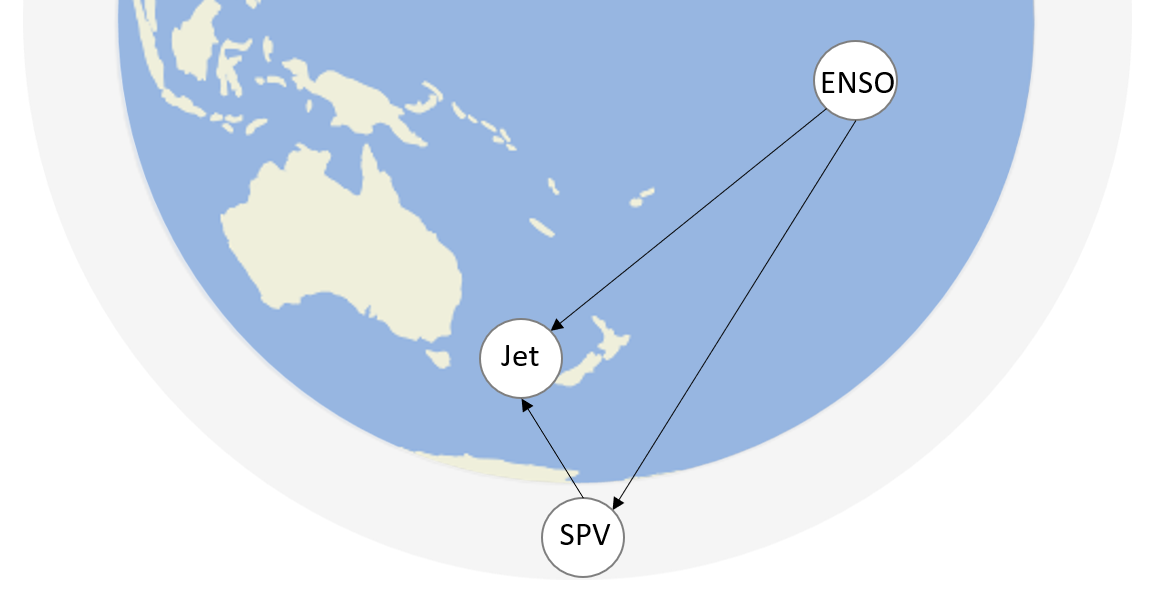

In [ ]:
# IF YOU ARE RUNNING THIS CODE LOCALLY ON YOUR MACHINE WITH JUPYTER NOTEBOOK 
#
#<img src="../images/ex3.png" width="500" height="600">

### References / Notes

1. The calculation of the SPV is described here: https://journals.ametsoc.org/jas/article/64/8/2968/103627/Interannual-Variability-in-the-Southern-Hemisphere
2. Details on the tropospheric and stratospheric pathway of ENSO on Jet are for example discussed here: https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2018JD030173

## Imports

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import statsmodels.api as sm
from scipy import signal

import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 1) Load the data + plot time-series

In [ ]:
### IF YOU ARE RUNNING THIS WITH GOOGLE COLAB
# 1. download the files in sample_data_csv/ to your Desktop
# 2. run this line of code: it will ask you to upload the data
# 3. select the files needed for this code:
# enso_full_ond_no2002.csv
# sh_jet_ond_no2002.csv
# vortex_breakdown_no2002.csv

# data from 1950 to 2019, year 2002 was removed because it is the only SH Sudden Stratospheric Warming on record.

from google.colab import files
uploaded = files.upload()


Saving enso_ond.csv to enso_ond.csv
Saving jet_ond.csv to jet_ond.csv
Saving spv_ond.csv to spv_ond.csv


## Step 1): Load the data + plot time series

In [ ]:
# IF YOU ARE RUNNING THIS CODE WITH GOOGLE COLAB
enso_ts   = pd.read_csv('enso_ond.csv')
jet_ts   = pd.read_csv('jet_ond.csv')  
spv_ts   = pd.read_csv('spv_ond.csv') 
#spv stands for the date of the SH polar vortex breakdown (units are in days after 1st Oct)

In [ ]:
spv_ts

,year,spv
0,1950,85.0
1,1951,66.0
2,1952,58.0
3,1953,61.0
4,1954,87.0
...,...,...
63,2014,72.0
64,2015,73.0
65,2016,50.0
66,2017,62.0


#### Plot the data

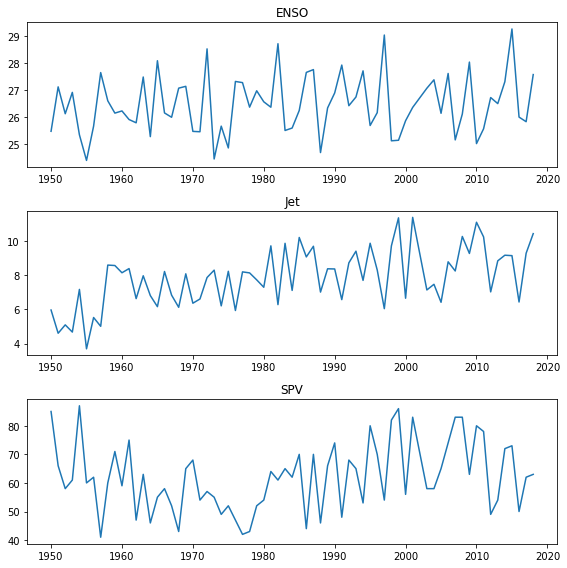

In [ ]:
fig = plt.figure(figsize=(8, 8))

plt.subplot(311)
plt.plot(enso_ts['year'],enso_ts['enso'])
plt.title('ENSO')

plt.subplot(312)
plt.plot(jet_ts['year'],jet_ts['jet'])
plt.title('Jet')

plt.subplot(313)
plt.plot(spv_ts['year'],spv_ts['spv'])
plt.title('SPV')
plt.tight_layout()

### Step 2)   Data Processing

In [ ]:
years = enso_ts['year'] 
enso_data = enso_ts['enso'] 
jet_data = jet_ts['jet']
spv_data  = spv_ts['spv']

#### Standardize the data (zero mean, unit variance)

In [ ]:
ENSO = (enso_data - np.mean(enso_data))/np.std(enso_data)
JET = (jet_data - np.mean(jet_data))/np.std(jet_data)
SPV = (spv_data - np.mean(spv_data))/np.std(spv_data)

#### Detrend

In [ ]:
ENSO   = signal.detrend(ENSO)
JET    = signal.detrend(JET)
SPV = signal.detrend(SPV)

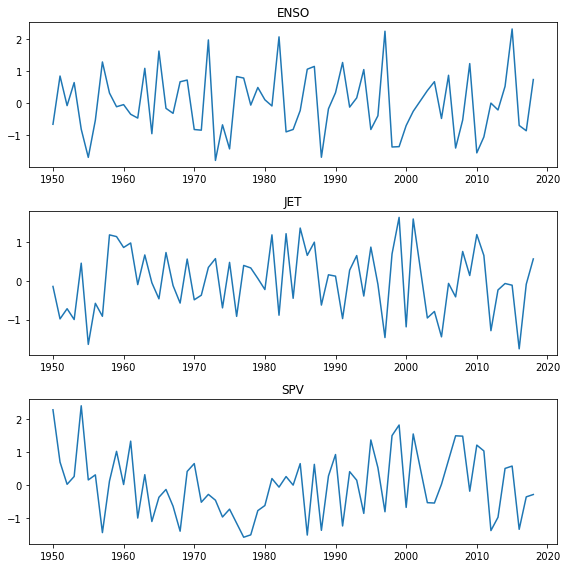

In [ ]:
fig = plt.figure(figsize=(8, 8))
#plt.suptitle("Standardised and detrended")

plt.subplot(311)
plt.plot(years,ENSO)
plt.title('ENSO')

plt.subplot(312)
plt.plot(years,JET)
plt.title('JET')

plt.subplot(313)
plt.plot(years,SPV)
plt.title('SPV')
plt.tight_layout()

## EXERCISE (solutions at the end of the notebook)

In [ ]:
#================================================================
# A. Determine the total effect of ENSO on Jet
#================================================================


In [ ]:
#==========================================================================
# B. Determine the tropospheric-only effect of ENSO on JET 
#==========================================================================


In [ ]:
#==========================================================================
# C. Determine the causal effect of the 
# stratoshperic pathway from ENSO --> SPV --> JET
#==========================================================================

#============
# ENSO to SPV:
#============


#============
# SPV to Jet 
#============

 

#=============================================================
# Strength of stratopsheric pathway  ENSO --> SPV --> JET
#=============================================================


In [ ]:
#========================================================================================
# D. Compare the total effect with the sum of the stratospheric and tropospheric patways
#========================================================================================



### Conclusions

When regressing Jet on ENSO, a negative, total effect of - 0.14 is found. Separating the indirect stratospheric pathway (ENSO $\to$ VORTEX $\to$ JET) from the direct tropospheric pathway (ENSO$\to$JET), the direct effect of ENSO on JET is found to be weaker (-0.04) than the indirect, stratopsheric pathway (-0.10).


## SOLUTIONS

In [ ]:
#================================================================
# A. Determine the total effect of ENSO on Jet
#================================================================
X =  ENSO
Y = JET

model = sm.OLS(Y,X)
results = model.fit()

ENSOtoJET_tot = round(results.params[0],2)

print("The total causal effect of ENSO on JET  =",ENSOtoJET_tot)

The total causal effect of ENSO on JET  = -0.14


In [ ]:
#==========================================================================
# B. Determine the tropospheric-only effect of ENSO on JET 
#==========================================================================
X = np.stack([ENSO, SPV]).T
Y = JET

model = sm.OLS(Y,X)
results = model.fit()

ENSOtoJET_tropo = results.params[0]
VORTEXtoJET     = results.params[1] 

print("The direct effect of ENSO on Jet (conditioned on SPV) is ", round(ENSOtoJET_tropo,2))
print("The regression coeff. of SPV on Jet is ", round(VORTEXtoJET,2))

The direct effect of ENSO on Jet (conditioned on SPV) is  -0.04
The regression coeff. of SPV on Jet is  0.39


In [ ]:
#==========================================================================
# C. Determine the causal effect of the 
# stratoshperic pathway from ENSO --> SPV --> JET
#==========================================================================

#============
# ENSO to SPV:
#============
X = ENSO
Y = SPV

model = sm.OLS(Y,X)
results = model.fit()

ENSOtoVORTEX = results.params[0]

#============
# SPV to Jet 
#============

X = np.stack([ENSO, SPV]).T
Y = JET

model = sm.OLS(Y,X)
results = model.fit()

VORTEXtoJET     = results.params[1] 

#=================================
# Strength of stratopsheric pathway
#=================================
Strato_pathway = ENSOtoVORTEX * VORTEXtoJET 


print("The causal effect of ENSO on SPV is ", round(ENSOtoVORTEX,2))
print("The causal effect of SPV on Jet (cond on ENSO) is ", round(VORTEXtoJET ,2))
print("The strength of the stratospheric pathway is ", round(Strato_pathway,2))

The causal effect of ENSO on SPV is  -0.26
The causal effect of SPV on Jet (cond on ENSO) is  0.39
The strength of the stratospheric pathway is  -0.1


In [ ]:
#==========================================================================
# D. Compare the total effect with the sum of the stratospheric and tropospheric patways
#==========================================================================

print("The total effect of ENSO on JET  =", ENSOtoJET_tot)

print("The sum of tropospheric + stratospheric pathways is ", round(Strato_pathway + ENSOtoJET_tropo,2))

The total effect of ENSO on JET  = -0.14
The sum of tropospheric + stratospheric pathways is  -0.14
